In [67]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('C:/Users/mertc/OneDrive/Desktop/Amazon_Proje/amazon.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1465, 16)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [70]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False).astype(float)

print("Data cleaning completed!")
print(f"\nMissing values after cleaning:")
print(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].isnull().sum())

Data cleaning completed!

Missing values after cleaning:
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
dtype: int64


In [71]:
df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353
std,6944.304394,10874.826864,21.635905,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [72]:
df['main_category'] = df['category'].str.split('|').str[0]
df['sub_category'] = df['category'].str.split('|').str[1]

print("Main Categories:")
print(df['main_category'].value_counts())
print(f"\nTotal main categories: {df['main_category'].nunique()}")

Main Categories:
main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

Total main categories: 9


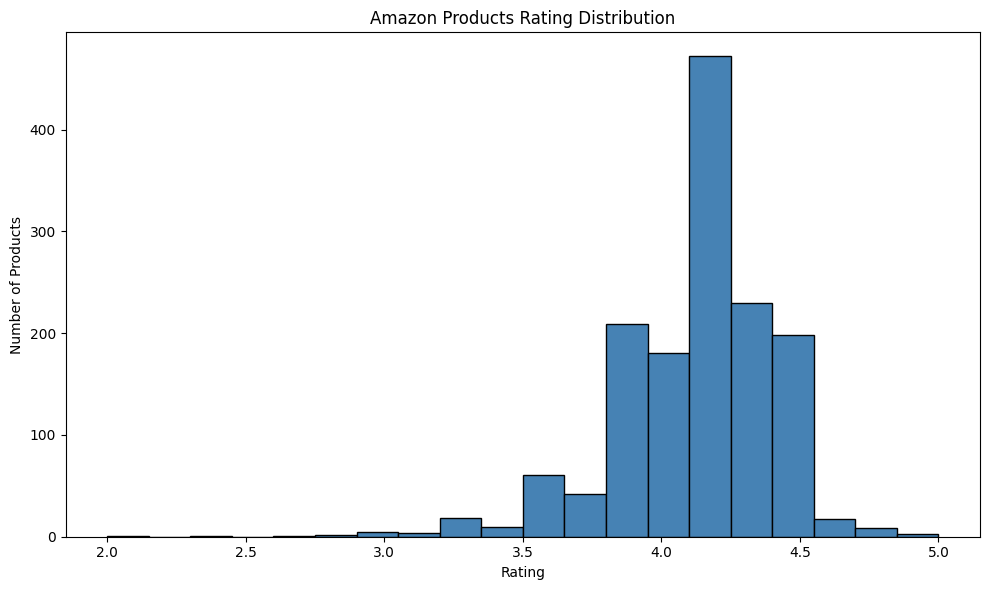

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(df['rating'].dropna(), bins=20, color='steelblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.title('Amazon Products Rating Distribution')
plt.tight_layout()
plt.show()

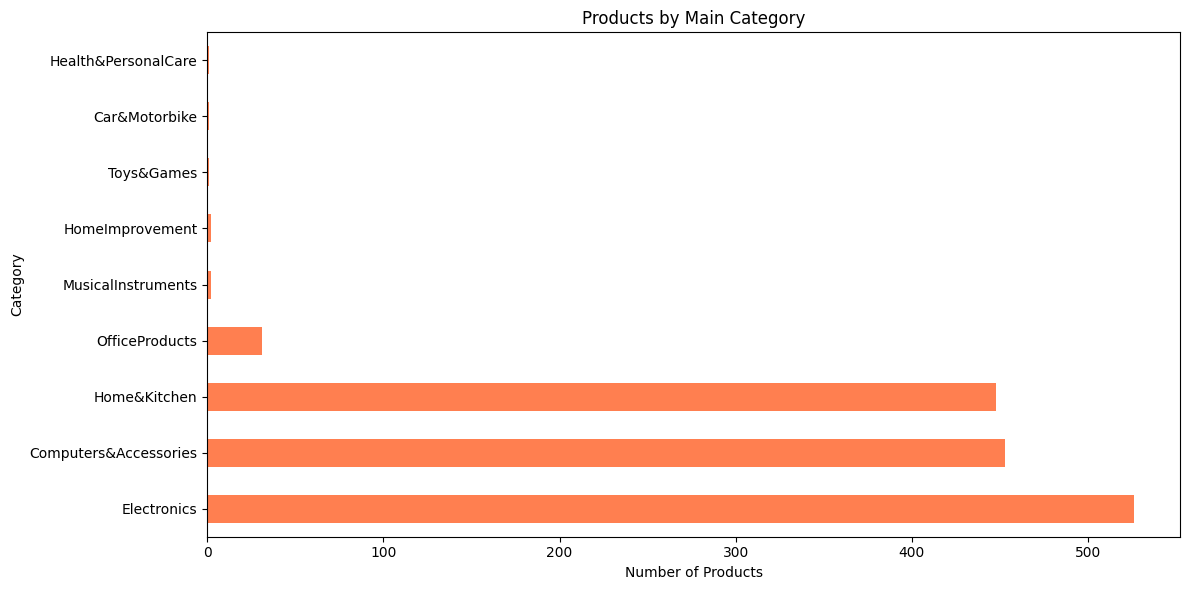

In [74]:
plt.figure(figsize=(12, 6))
df['main_category'].value_counts().plot(kind='barh', color='coral')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.title('Products by Main Category')
plt.tight_layout()
plt.show()

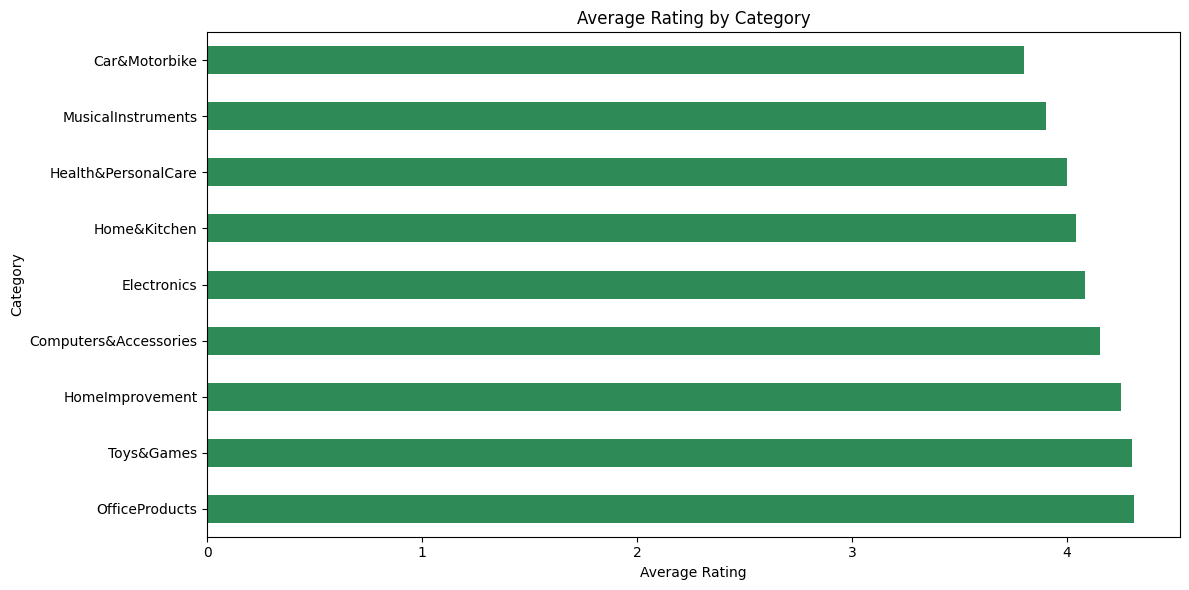

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


In [75]:
category_ratings = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_ratings.plot(kind='barh', color='seagreen')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Average Rating by Category')
plt.tight_layout()
plt.show()

print(category_ratings)

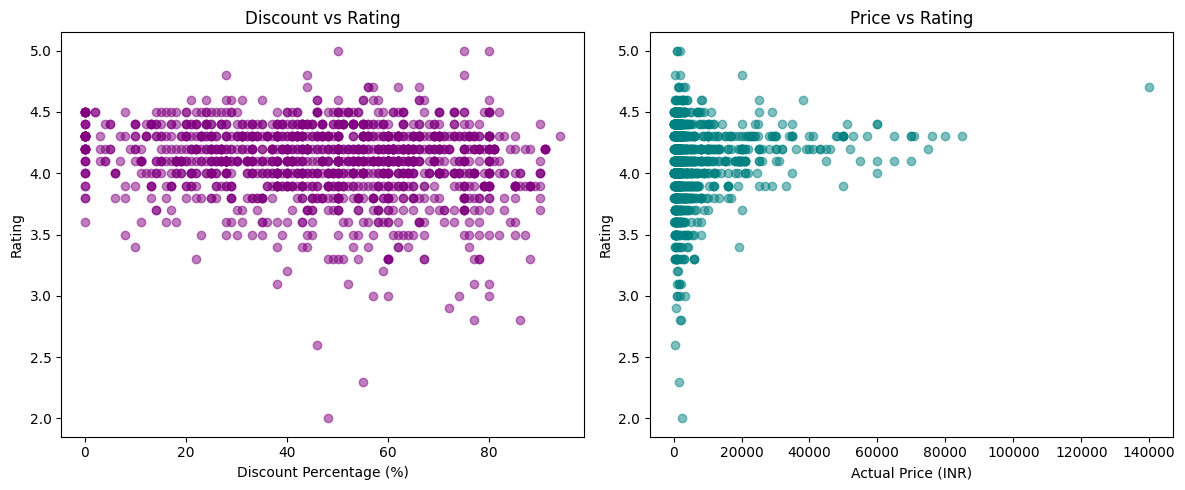

In [76]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['discount_percentage'], df['rating'], alpha=0.5, color='purple')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Rating')
plt.title('Discount vs Rating')

plt.subplot(1, 2, 2)
plt.scatter(df['actual_price'], df['rating'], alpha=0.5, color='teal')
plt.xlabel('Actual Price (INR)')
plt.ylabel('Rating')
plt.title('Price vs Rating')

plt.tight_layout()
plt.show()

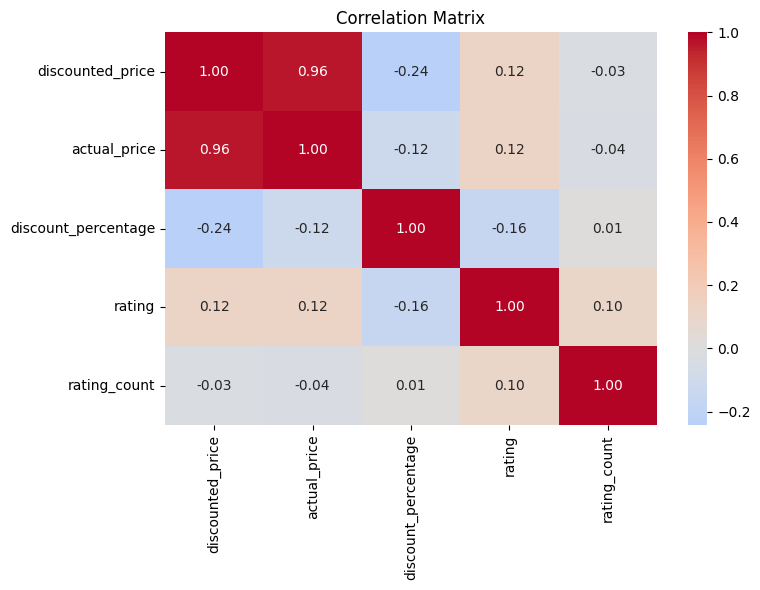


Correlation with Rating:
rating                 1.000000
actual_price           0.121642
discounted_price       0.120337
rating_count           0.102235
discount_percentage   -0.155375
Name: rating, dtype: float64


In [77]:
correlation_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nCorrelation with Rating:")
print(corr_matrix['rating'].sort_values(ascending=False))

                 rating  discount_percentage  product_count
price_segment                                              
Budget         4.074545            40.577273            220
Mid-Range      4.099385            52.303077            650
Premium        4.065679            48.347291            406
Luxury         4.178836            38.703704            189


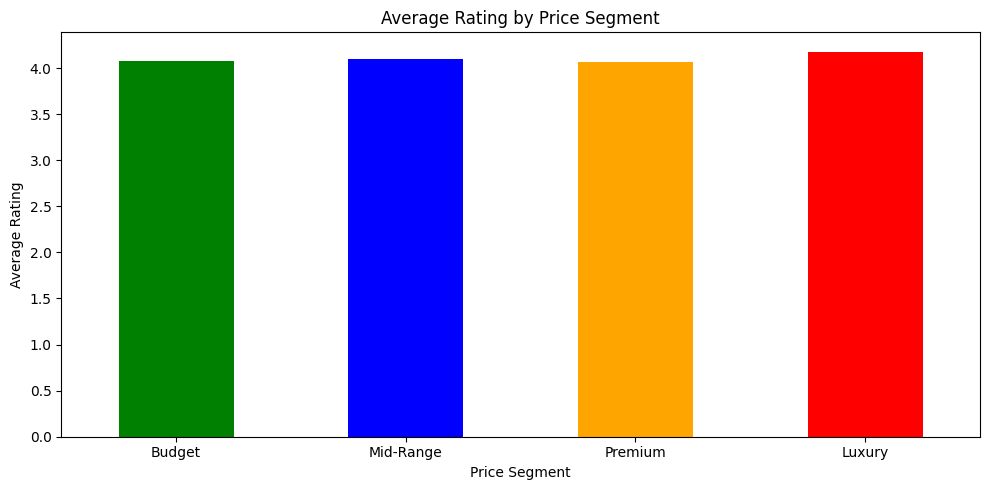

In [78]:
df['price_segment'] = pd.cut(df['actual_price'], 
                              bins=[0, 500, 2000, 10000, float('inf')],
                              labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'])

segment_analysis = df.groupby('price_segment').agg({
    'rating': 'mean',
    'discount_percentage': 'mean',
    'product_id': 'count'
}).rename(columns={'product_id': 'product_count'})

print(segment_analysis)

plt.figure(figsize=(10, 5))
segment_analysis['rating'].plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Price Segment')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Segment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [80]:
df['brand'] = df['product_name'].str.split().str[0]

top_brands = df['brand'].value_counts().head(15)
print("Top 15 Brands by Product Count:")
print(top_brands)

Top 15 Brands by Product Count:
brand
boAt            67
Samsung         36
AmazonBasics    33
Portronics      31
Ambrane         29
Bajaj           26
Redmi           26
Fire-Boltt      26
Amazon          25
Noise           24
Wayona          24
HP              21
MI              21
Duracell        20
Havells         19
Name: count, dtype: int64


Top 10 Brands Performance:
              rating  rating_count  discount_percentage  product_count
brand                                                                 
AmazonBasics    4.31      54812.67                57.48             33
Fire-Boltt      4.23      20618.38                79.50             26
Samsung         4.20      25052.28                32.36             36
Portronics      4.16       7086.84                55.65             31
Amazon          4.14      50331.62                58.40             25
Bajaj           4.08      10416.77                36.04             26
boAt            4.08      65918.93                63.04             67
Redmi           4.05      72249.31                25.69             26
Ambrane         4.03      13262.86                45.31             29
Noise           3.98      25892.54                57.12             24


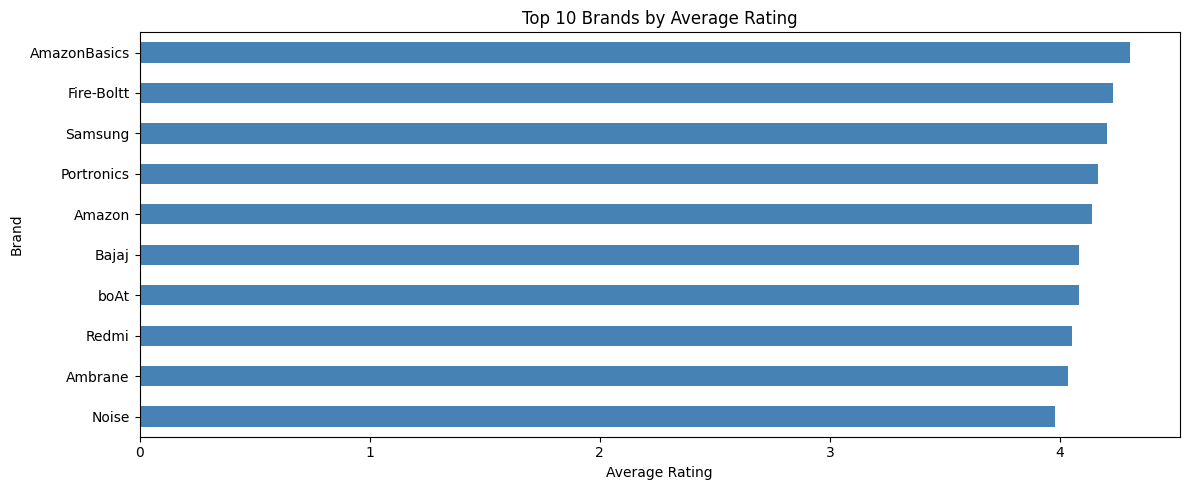

In [81]:
top_brand_list = top_brands.head(10).index.tolist()

brand_performance = df[df['brand'].isin(top_brand_list)].groupby('brand').agg({
    'rating': 'mean',
    'rating_count': 'mean',
    'discount_percentage': 'mean',
    'product_id': 'count'
}).rename(columns={'product_id': 'product_count'}).sort_values('rating', ascending=False)

print("Top 10 Brands Performance:")
print(brand_performance.round(2))

plt.figure(figsize=(12, 5))
brand_performance['rating'].sort_values().plot(kind='barh', color='steelblue')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.title('Top 10 Brands by Average Rating')
plt.tight_layout()
plt.show()

In [83]:
from textblob import TextBlob

def get_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(str(text)).sentiment.polarity

df['review_sentiment'] = df['review_content'].apply(get_sentiment)

print(f"Sentiment Score Range: {df['review_sentiment'].min():.2f} to {df['review_sentiment'].max():.2f}")
print(f"Average Sentiment: {df['review_sentiment'].mean():.3f}")
print(f"\nSentiment Distribution:")
print(df['review_sentiment'].describe())

Sentiment Score Range: -0.60 to 1.00
Average Sentiment: 0.268

Sentiment Distribution:
count    1465.000000
mean        0.268223
std         0.138380
min        -0.600000
25%         0.177652
50%         0.252976
75%         0.350000
max         1.000000
Name: review_sentiment, dtype: float64


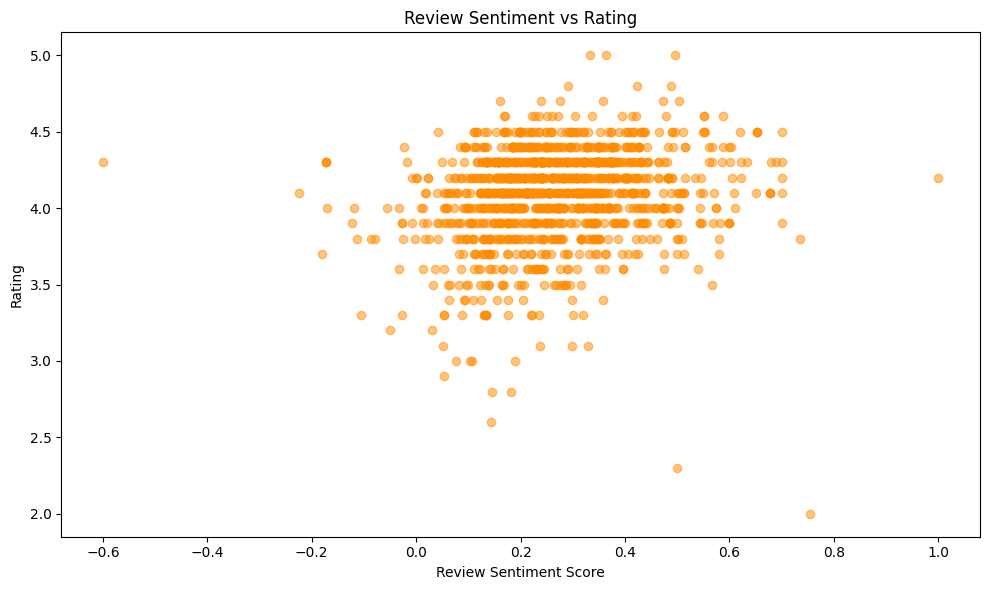

Correlation between Sentiment and Rating: 0.178


In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(df['review_sentiment'], df['rating'], alpha=0.5, color='darkorange')
plt.xlabel('Review Sentiment Score')
plt.ylabel('Rating')
plt.title('Review Sentiment vs Rating')
plt.tight_layout()
plt.show()

sentiment_corr = df['review_sentiment'].corr(df['rating'])
print(f"Correlation between Sentiment and Rating: {sentiment_corr:.3f}")

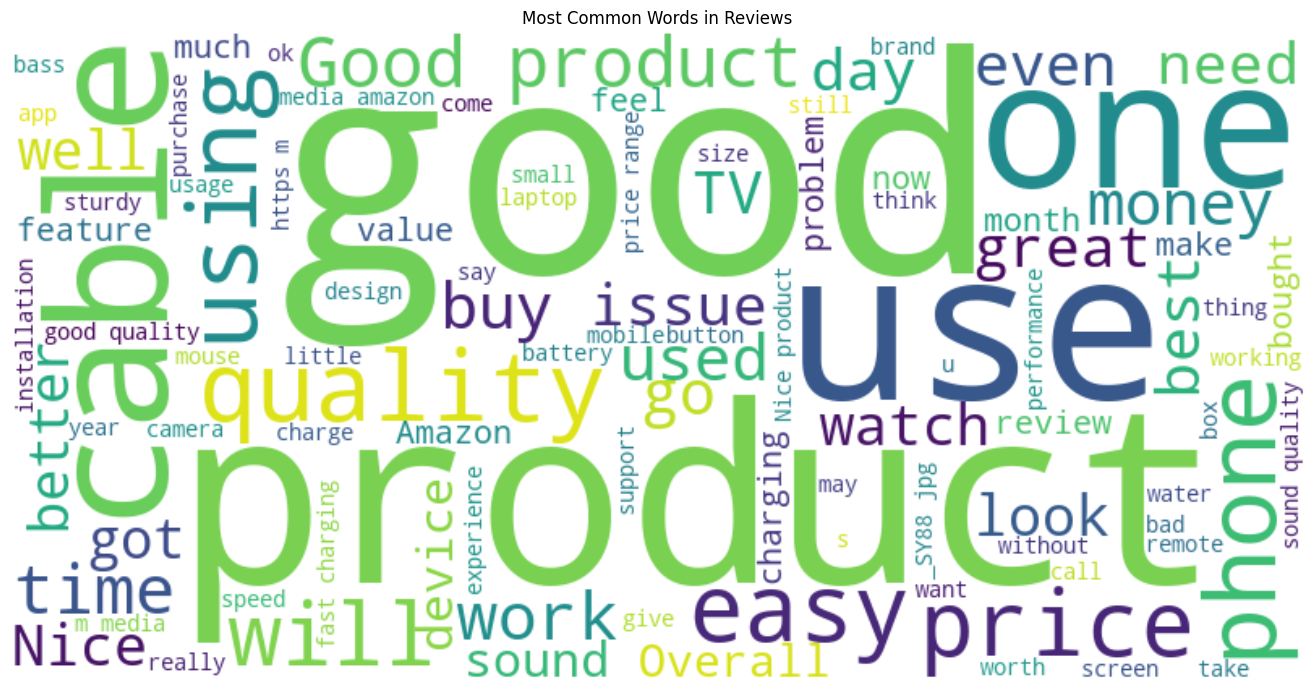

In [86]:
from wordcloud import WordCloud

all_reviews = ' '.join(df['review_content'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      max_words=100, colormap='viridis').generate(all_reviews)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.tight_layout()
plt.show()

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

features = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count', 'review_sentiment']
target = 'rating'

ml_data = df[features + [target]].dropna()
X = ml_data[features]
y = ml_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} products")
print(f"Test set: {len(X_test)} products")

Training set: 1169 products
Test set: 293 products


In [88]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("=" * 50)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 50)

print("\nLinear Regression:")
print(f"   MAE: {mean_absolute_error(y_test, lr_pred):.3f}")
print(f"   R2 Score: {r2_score(y_test, lr_pred):.3f}")

print("\nRandom Forest:")
print(f"   MAE: {mean_absolute_error(y_test, rf_pred):.3f}")
print(f"   R2 Score: {r2_score(y_test, rf_pred):.3f}")

MODEL PERFORMANCE COMPARISON

Linear Regression:
   MAE: 0.205
   R2 Score: 0.100

Random Forest:
   MAE: 0.181
   R2 Score: 0.188


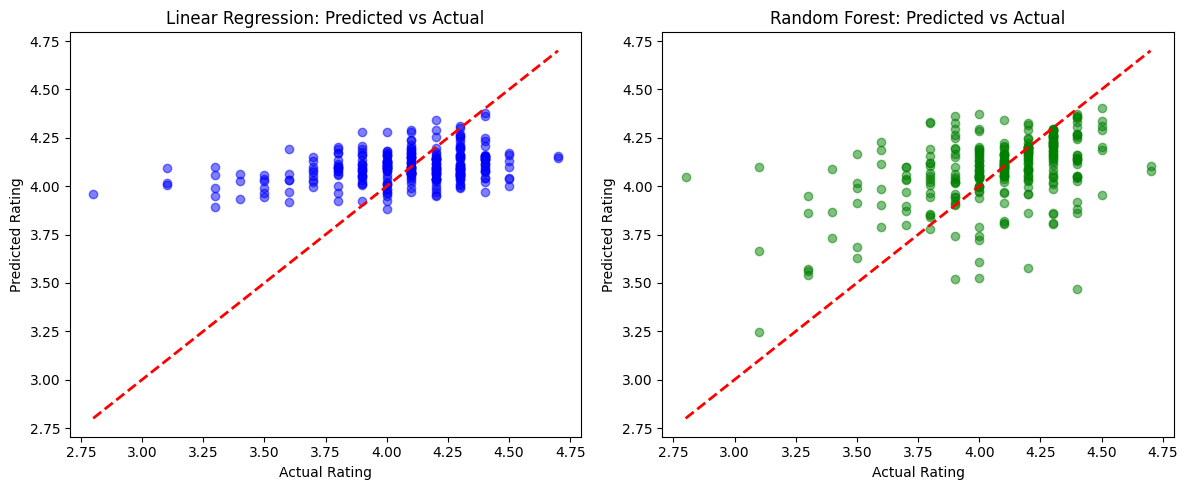

In [89]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression: Predicted vs Actual')

plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Random Forest: Predicted vs Actual')

plt.tight_layout()
plt.show()

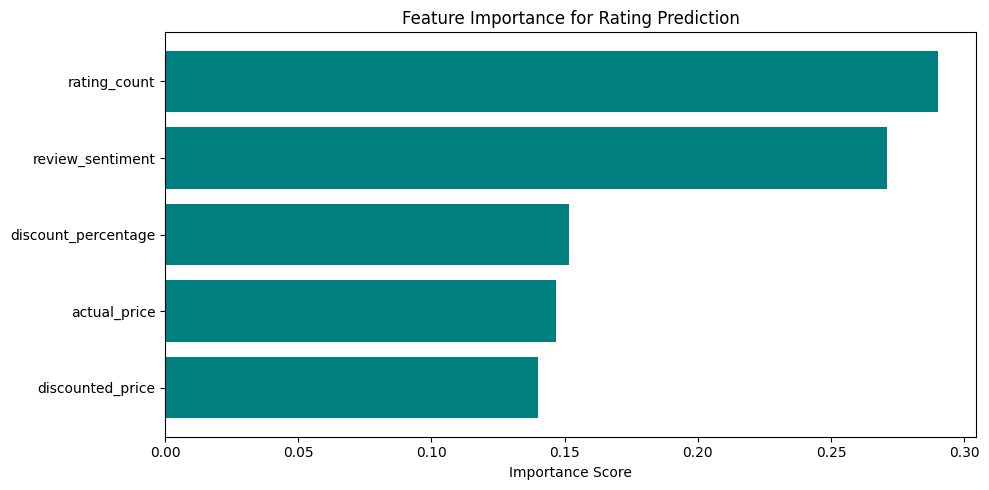

               Feature  Importance
3         rating_count    0.290013
4     review_sentiment    0.271179
2  discount_percentage    0.151815
1         actual_price    0.146829
0     discounted_price    0.140164


In [90]:
importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(importance['Feature'], importance['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.title('Feature Importance for Rating Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(importance)

In [91]:
print("=" * 60)
print("AMAZON SALES DATASET - PROJECT SUMMARY")
print("=" * 60)

print("\nDATASET OVERVIEW:")
print(f"   - Total products analyzed: {len(df)}")
print(f"   - Main categories: {df['main_category'].nunique()}")
print(f"   - Unique brands identified: {df['brand'].nunique()}")

print("\nKEY STATISTICS:")
print(f"   - Average discount rate: {df['discount_percentage'].mean():.1f}%")
print(f"   - Average product rating: {df['rating'].mean():.2f}/5")
print(f"   - Average review sentiment: {df['review_sentiment'].mean():.3f} (positive)")

print("\nTOP PERFORMERS:")
print(f"   - Highest rated category: {category_ratings.index[0]} ({category_ratings.values[0]:.2f})")
print(f"   - Top brand by rating: AmazonBasics (4.31)")
print(f"   - Most reviewed brand: Redmi (avg 72,249 reviews)")

print("\nMACHINE LEARNING RESULTS:")
print(f"   - Best model: Random Forest (R2: {r2_score(y_test, rf_pred):.3f}, MAE: {mean_absolute_error(y_test, rf_pred):.3f})")
print(f"   - Top feature: Rating Count ({importance.iloc[0]['Importance']*100:.1f}%)")
print(f"   - Second feature: Review Sentiment ({importance.iloc[1]['Importance']*100:.1f}%)")

print("\nBUSINESS INSIGHTS:")
print("   - Review sentiment strongly correlates with rating (0.178)")
print("   - High discount does NOT guarantee high rating (-0.155 correlation)")
print("   - Luxury products have highest average rating (4.18)")
print("   - Customer review volume is the best rating predictor")

print("=" * 60)

AMAZON SALES DATASET - PROJECT SUMMARY

DATASET OVERVIEW:
   - Total products analyzed: 1465
   - Main categories: 9
   - Unique brands identified: 437

KEY STATISTICS:
   - Average discount rate: 47.7%
   - Average product rating: 4.10/5
   - Average review sentiment: 0.268 (positive)

TOP PERFORMERS:
   - Highest rated category: OfficeProducts (4.31)
   - Top brand by rating: AmazonBasics (4.31)
   - Most reviewed brand: Redmi (avg 72,249 reviews)

MACHINE LEARNING RESULTS:
   - Best model: Random Forest (R2: 0.188, MAE: 0.181)
   - Top feature: Rating Count (29.0%)
   - Second feature: Review Sentiment (27.1%)

BUSINESS INSIGHTS:
   - Review sentiment strongly correlates with rating (0.178)
   - High discount does NOT guarantee high rating (-0.155 correlation)
   - Luxury products have highest average rating (4.18)
   - Customer review volume is the best rating predictor
